In [1]:
''' Program Description : Covid19 Endemic details of each country and continent in the world from a couple of public  APIs'''

' Program Description : Covid19 Endemic details of each country and continent in the world from a couple of public  APIs'

In [2]:
# API 1 : Rapid API, URL https://covid-193.p.rapidapi.com/statistics

In [3]:
# Import Libraies 
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import date
import sqlite3
from tabulate import tabulate

In [4]:
# Accessing Rapid API - COVID-19 data 
url = "https://covid-193.p.rapidapi.com/statistics"                       

querystring = {"country":"india"}                 # query string : select other country

headers = {
	"X-RapidAPI-Key": "1892c8507amsh394ab3093c2eab2p1fc9a8jsn57e51c27368a",
	"X-RapidAPI-Host": "covid-193.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data=response.json()
data                                              #data is in dictionary form

{'get': 'statistics',
 'parameters': {'country': 'india'},
 'errors': [],
 'results': 1,
 'response': [{'continent': 'Asia',
   'country': 'India',
   'population': 1406631776,
   'cases': {'new': None,
    'active': 1533,
    'critical': None,
    'recovered': 44462351,
    '1M_pop': '31988',
    'total': 44995802},
   'deaths': {'new': None, '1M_pop': '378', 'total': 531918},
   'tests': {'1M_pop': '661721', 'total': 930797975},
   'day': '2023-08-05',
   'time': '2023-08-05T08:45:08+00:00'}]}

In [5]:
df = pd.DataFrame.from_dict(data, orient='index')              #dataframe from dictionary 
df = df.transpose()
df

,get,parameters,errors,results,response
0,statistics,{'country': 'india'},[],1,"[{'continent': 'Asia', 'country': 'India', 'po..."


In [6]:
# information is accessable country by country. To get larger data usable for datascience project, let us try next API location

In [7]:
''' 
API location : https://covid-api.com/api/  '''

' \nAPI location : https://covid-api.com/api/  '

In [8]:
                                                               # Function to get json data from Public API
def get_covid_data(API_url, endpoint):
    # Function to get JSON data from a Public API
    url = API_url + endpoint

    try:
        response = requests.get(url)
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {url}: {e}")
        return None

In [9]:
def create_data_from_covid_data(data):                         # Function to get single column data dictionary
    if data is not None:
        df = pd.DataFrame(data)                                
        return df
    else:
        return None

In [10]:
def create_dataframe(df):                                     # converts to multi column dataframe
        dataframe = df['data'].apply(pd.Series) 
        return dataframe


In [11]:
def API():
    API_url = 'https://covid-api.com/api/'                     #no key access - anyone can use
    endpoint='reports'
    
    data = get_covid_data(API_url,endpoint)                  #calling get covid data function

    df = create_data_from_covid_data(data)                   #calling create data from covid data function
      
    dataframeRep = create_dataframe(df)                       #calling create dataframe function        
   
    return dataframeRep


In [12]:
dataframeReports = API()    # we will only use dataframeReports in our analysis 

In [13]:
dataframeReports.head(5)                                             # first dataframe 

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,region
0,2023-03-09,209451,7896,0,0,0,0,2023-03-10 04:21:03,201555,0,0.0377,"{'iso': 'AFG', 'name': 'Afghanistan', 'provinc..."
1,2023-03-09,334457,3598,0,14,0,0,2023-03-10 04:21:03,330859,14,0.0108,"{'iso': 'ALB', 'name': 'Albania', 'province': ..."
2,2023-03-09,271496,6881,0,2,0,0,2023-03-10 04:21:03,264615,2,0.0253,"{'iso': 'DZA', 'name': 'Algeria', 'province': ..."
3,2023-03-09,47890,165,0,0,0,0,2023-03-10 04:21:03,47725,0,0.0034,"{'iso': 'AND', 'name': 'Andorra', 'province': ..."
4,2023-03-09,105288,1933,0,0,0,0,2023-03-10 04:21:03,103355,0,0.0184,"{'iso': 'AGO', 'name': 'Angola', 'province': '..."


In [14]:
dataframeReports.tail(5) 

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,region
786,2023-03-09,11526994,43186,0,0,0,0,2023-03-10 04:21:03,11483808,0,0.0037,"{'iso': 'VNM', 'name': 'Vietnam', 'province': ..."
787,2023-03-09,703228,5708,0,0,0,0,2023-03-10 04:21:03,697520,0,0.0081,"{'iso': 'PSE', 'name': 'West Bank and Gaza', '..."
788,2023-03-09,11945,2159,0,0,0,0,2023-03-10 04:21:03,9786,0,0.1807,"{'iso': 'YEM', 'name': 'Yemen', 'province': ''..."
789,2023-03-09,343135,4057,0,0,0,0,2023-03-10 04:21:03,339078,0,0.0118,"{'iso': 'ZMB', 'name': 'Zambia', 'province': '..."
790,2023-03-09,264276,5671,0,0,0,0,2023-03-10 04:21:03,258605,0,0.0215,"{'iso': 'ZWE', 'name': 'Zimbabwe', 'province':..."


In [15]:
dataframeReports.shape

(791, 12)

In [16]:
dataframeReports.dtypes

date               object
confirmed           int64
deaths              int64
recovered           int64
confirmed_diff      int64
deaths_diff         int64
recovered_diff      int64
last_update        object
active              int64
active_diff         int64
fatality_rate     float64
region             object
dtype: object

In [17]:
dataframeReports.describe()

,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,active,active_diff,fatality_rate
count,7.910000e+02,791.000000,791.0,791.000000,791.000000,791.0,7.910000e+02,791.000000,791.000000
mean,8.553031e+05,8700.046776,0.0,245.386852,2.343869,0.0,8.466031e+05,243.042984,0.015246
std,2.397051e+06,19993.091547,0.0,1412.119417,18.059342,0.0,2.382865e+06,1396.168046,0.025190
min,0.000000e+00,0.000000,0.0,0.000000,-1.000000,0.0,-3.380000e+02,-13.000000,0.000000
25%,6.179550e+04,534.500000,0.0,0.000000,0.000000,0.0,5.898450e+04,0.000000,0.004300
50%,2.111580e+05,2548.000000,0.0,0.000000,0.000000,0.0,2.075050e+05,0.000000,0.010300
75%,6.732080e+05,8297.000000,0.0,89.000000,0.000000,0.0,6.673000e+05,88.500000,0.019100
max,3.861851e+07,186138.000000,0.0,26285.000000,431.000000,0.0,3.845700e+07,25854.000000,0.533600


In [18]:
# Data Preprocessing: 
''' Count of Missing Values & Percentage of Missing Values (in numeric columns)
 '''                            

' Count of Missing Values & Percentage of Missing Values (in numeric columns)\n '

In [19]:
column_names = ['confirmed', 'deaths', 'recovered', 'confirmed_diff', 'deaths_diff', 'recovered_diff', 'active', 'active_diff']

data = []
for column in column_names:
    missing_count = (dataframeReports[column] == 0).sum()
    missing_percentage = (missing_count / len(dataframeReports)) * 100
    data.append([column, missing_count, missing_percentage])

table_headers = ["Column Name", "Null Values", "Missing Percentage"]
table = tabulate(data, headers=table_headers, tablefmt='grid')

print(f'Total number of rows: {len(dataframeReports)}\n')
print(table)

Total number of rows: 791

+----------------+---------------+----------------------+
| Column Name    |   Null Values |   Missing Percentage |
+================+===============+======================+
| confirmed      |            11 |              1.39064 |
+----------------+---------------+----------------------+
| deaths         |            33 |              4.17193 |
+----------------+---------------+----------------------+
| recovered      |           791 |            100       |
+----------------+---------------+----------------------+
| confirmed_diff |           441 |             55.7522  |
+----------------+---------------+----------------------+
| deaths_diff    |           630 |             79.646   |
+----------------+---------------+----------------------+
| recovered_diff |           791 |            100       |
+----------------+---------------+----------------------+
| active         |             8 |              1.01138 |
+----------------+---------------+-----------

In [20]:
# outliers : column 'region' is filled with dictionaries as shown below

In [21]:
data=dataframeReports['region']                                      
data

0      {'iso': 'AFG', 'name': 'Afghanistan', 'provinc...
1      {'iso': 'ALB', 'name': 'Albania', 'province': ...
2      {'iso': 'DZA', 'name': 'Algeria', 'province': ...
3      {'iso': 'AND', 'name': 'Andorra', 'province': ...
4      {'iso': 'AGO', 'name': 'Angola', 'province': '...
                             ...                        
786    {'iso': 'VNM', 'name': 'Vietnam', 'province': ...
787    {'iso': 'PSE', 'name': 'West Bank and Gaza', '...
788    {'iso': 'YEM', 'name': 'Yemen', 'province': ''...
789    {'iso': 'ZMB', 'name': 'Zambia', 'province': '...
790    {'iso': 'ZWE', 'name': 'Zimbabwe', 'province':...
Name: region, Length: 791, dtype: object

In [23]:
# Code to covert the column 'region' contents to another dataframe

In [24]:
data=dataframeReports['region']                                      
data

dataframeLocation=data.apply(pd.Series)                                #location dataframe
dataframeLocation

,iso,name,province,lat,long,cities
0,AFG,Afghanistan,,33.9391,67.7100,[]
1,ALB,Albania,,41.1533,20.1683,[]
2,DZA,Algeria,,28.0339,1.6596,[]
3,AND,Andorra,,42.5063,1.5218,[]
4,AGO,Angola,,-11.2027,17.8739,[]
...,...,...,...,...,...,...
786,VNM,Vietnam,,14.0583,108.2772,[]
787,PSE,West Bank and Gaza,,31.9522,35.2332,[]
788,YEM,Yemen,,15.552726999999999,48.516388,[]
789,ZMB,Zambia,,-13.1339,27.8493,[]


In [25]:
dataframeLocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   iso       791 non-null    object
 1   name      791 non-null    object
 2   province  791 non-null    object
 3   lat       775 non-null    object
 4   long      775 non-null    object
 5   cities    791 non-null    object
dtypes: object(6)
memory usage: 37.2+ KB


In [26]:
dataframeLocation.dtypes

iso         object
name        object
province    object
lat         object
long        object
cities      object
dtype: object

In [27]:
dataframeLocation.value_counts 

<bound method DataFrame.value_counts of      iso                name province                 lat       long cities
0    AFG         Afghanistan                      33.9391    67.7100     []
1    ALB             Albania                      41.1533    20.1683     []
2    DZA             Algeria                      28.0339     1.6596     []
3    AND             Andorra                      42.5063     1.5218     []
4    AGO              Angola                     -11.2027    17.8739     []
..   ...                 ...      ...                 ...        ...    ...
786  VNM             Vietnam                      14.0583   108.2772     []
787  PSE  West Bank and Gaza                      31.9522    35.2332     []
788  YEM               Yemen           15.552726999999999  48.516388     []
789  ZMB              Zambia                     -13.1339    27.8493     []
790  ZWE            Zimbabwe                     -19.0154    29.1549     []

[791 rows x 6 columns]>

In [28]:
dataframeLocation.describe()

,iso,name,province,lat,long,cities
count,791,791,791,775,775,791
unique,196,196,599,769,759,52
top,RUS,Russia,,0.0,0.0,[]
freq,83,83,174,4,4,740


In [29]:
#column_names = ['iso', 'name', 'province', 'lat', 'long', 'cities']  of dataframeLocation
# this dataframe is a column 'region' in  dataframeReports, we can concatenate both to create one dataframe or add one column ‘iso’ to dataframeReports

In [30]:
# adding 'ISO' of dataframeLocation to  dataframeReports 
dataframeReports['iso'] = dataframeLocation['iso']
print(dataframeReports)



           date  confirmed  deaths  recovered  confirmed_diff  deaths_diff  \
0    2023-03-09     209451    7896          0               0            0   
1    2023-03-09     334457    3598          0              14            0   
2    2023-03-09     271496    6881          0               2            0   
3    2023-03-09      47890     165          0               0            0   
4    2023-03-09     105288    1933          0               0            0   
..          ...        ...     ...        ...             ...          ...   
786  2023-03-09   11526994   43186          0               0            0   
787  2023-03-09     703228    5708          0               0            0   
788  2023-03-09      11945    2159          0               0            0   
789  2023-03-09     343135    4057          0               0            0   
790  2023-03-09     264276    5671          0               0            0   

     recovered_diff          last_update    active  active_diff

In [31]:
# let us drop the column 'region' as we SUBSTITUTED IT WITH 'iso' COLUMN 
del dataframeReports['region']
dataframeReports

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso
0,2023-03-09,209451,7896,0,0,0,0,2023-03-10 04:21:03,201555,0,0.0377,AFG
1,2023-03-09,334457,3598,0,14,0,0,2023-03-10 04:21:03,330859,14,0.0108,ALB
2,2023-03-09,271496,6881,0,2,0,0,2023-03-10 04:21:03,264615,2,0.0253,DZA
3,2023-03-09,47890,165,0,0,0,0,2023-03-10 04:21:03,47725,0,0.0034,AND
4,2023-03-09,105288,1933,0,0,0,0,2023-03-10 04:21:03,103355,0,0.0184,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...
786,2023-03-09,11526994,43186,0,0,0,0,2023-03-10 04:21:03,11483808,0,0.0037,VNM
787,2023-03-09,703228,5708,0,0,0,0,2023-03-10 04:21:03,697520,0,0.0081,PSE
788,2023-03-09,11945,2159,0,0,0,0,2023-03-10 04:21:03,9786,0,0.1807,YEM
789,2023-03-09,343135,4057,0,0,0,0,2023-03-10 04:21:03,339078,0,0.0118,ZMB


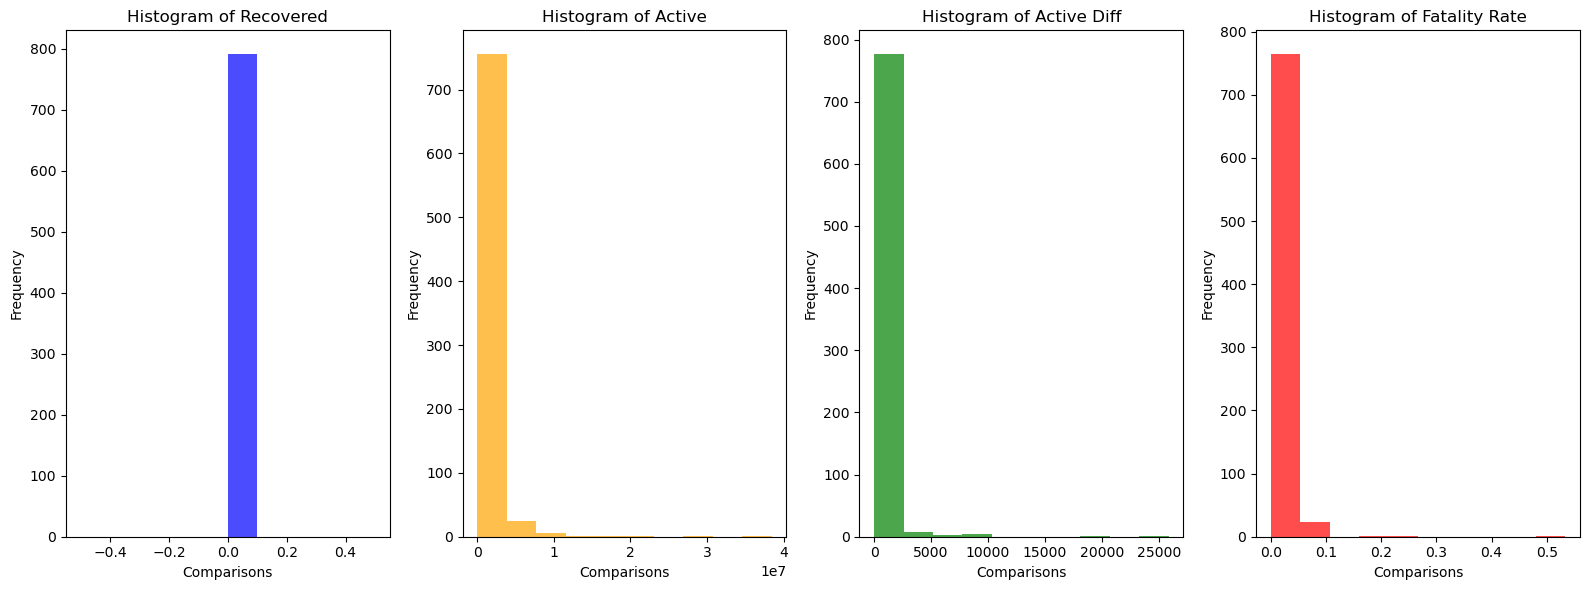

In [32]:
# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

# Plot histogram for 'recovered' column in the first subplot
axes[0].hist(dataframeReports['recovered'], color='blue', alpha=0.7)
axes[0].set_title('Histogram of Recovered')
axes[0].set_xlabel('Comparisons')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'active' column in the second subplot
axes[1].hist(dataframeReports['active'], color='orange', alpha=0.7)
axes[1].set_title('Histogram of Active')
axes[1].set_xlabel('Comparisons')
axes[1].set_ylabel('Frequency')

# Plot histogram for 'active_diff' column in the third subplot
axes[2].hist(dataframeReports['active_diff'], color='green', alpha=0.7)
axes[2].set_title('Histogram of Active Diff')
axes[2].set_xlabel('Comparisons')
axes[2].set_ylabel('Frequency')

# Plot histogram for 'fatality_rate' column in the fourth subplot
axes[3].hist(dataframeReports['fatality_rate'], color='red', alpha=0.7)
axes[3].set_title('Histogram of Fatality Rate')
axes[3].set_xlabel('Comparisons')
axes[3].set_ylabel('Frequency')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()



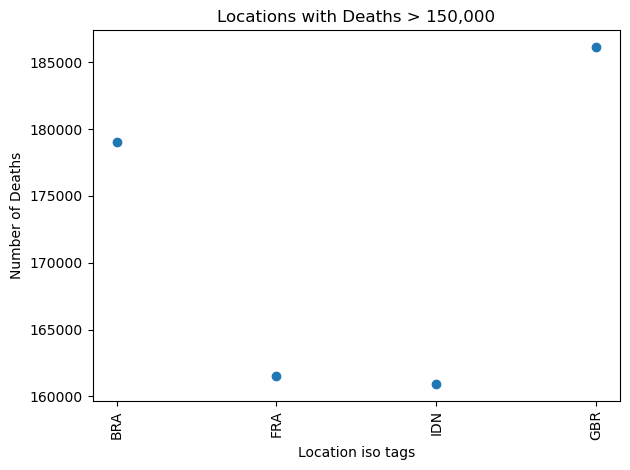

In [33]:
import matplotlib.pyplot as plt

# 'dataframeReportsLocation'
filtered_data = dataframeReports[dataframeReports['deaths'] > 150000]

plt.scatter(filtered_data['iso'], filtered_data['deaths'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Location iso tags')
plt.ylabel('Number of Deaths')
plt.title('Locations with Deaths > 150,000')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

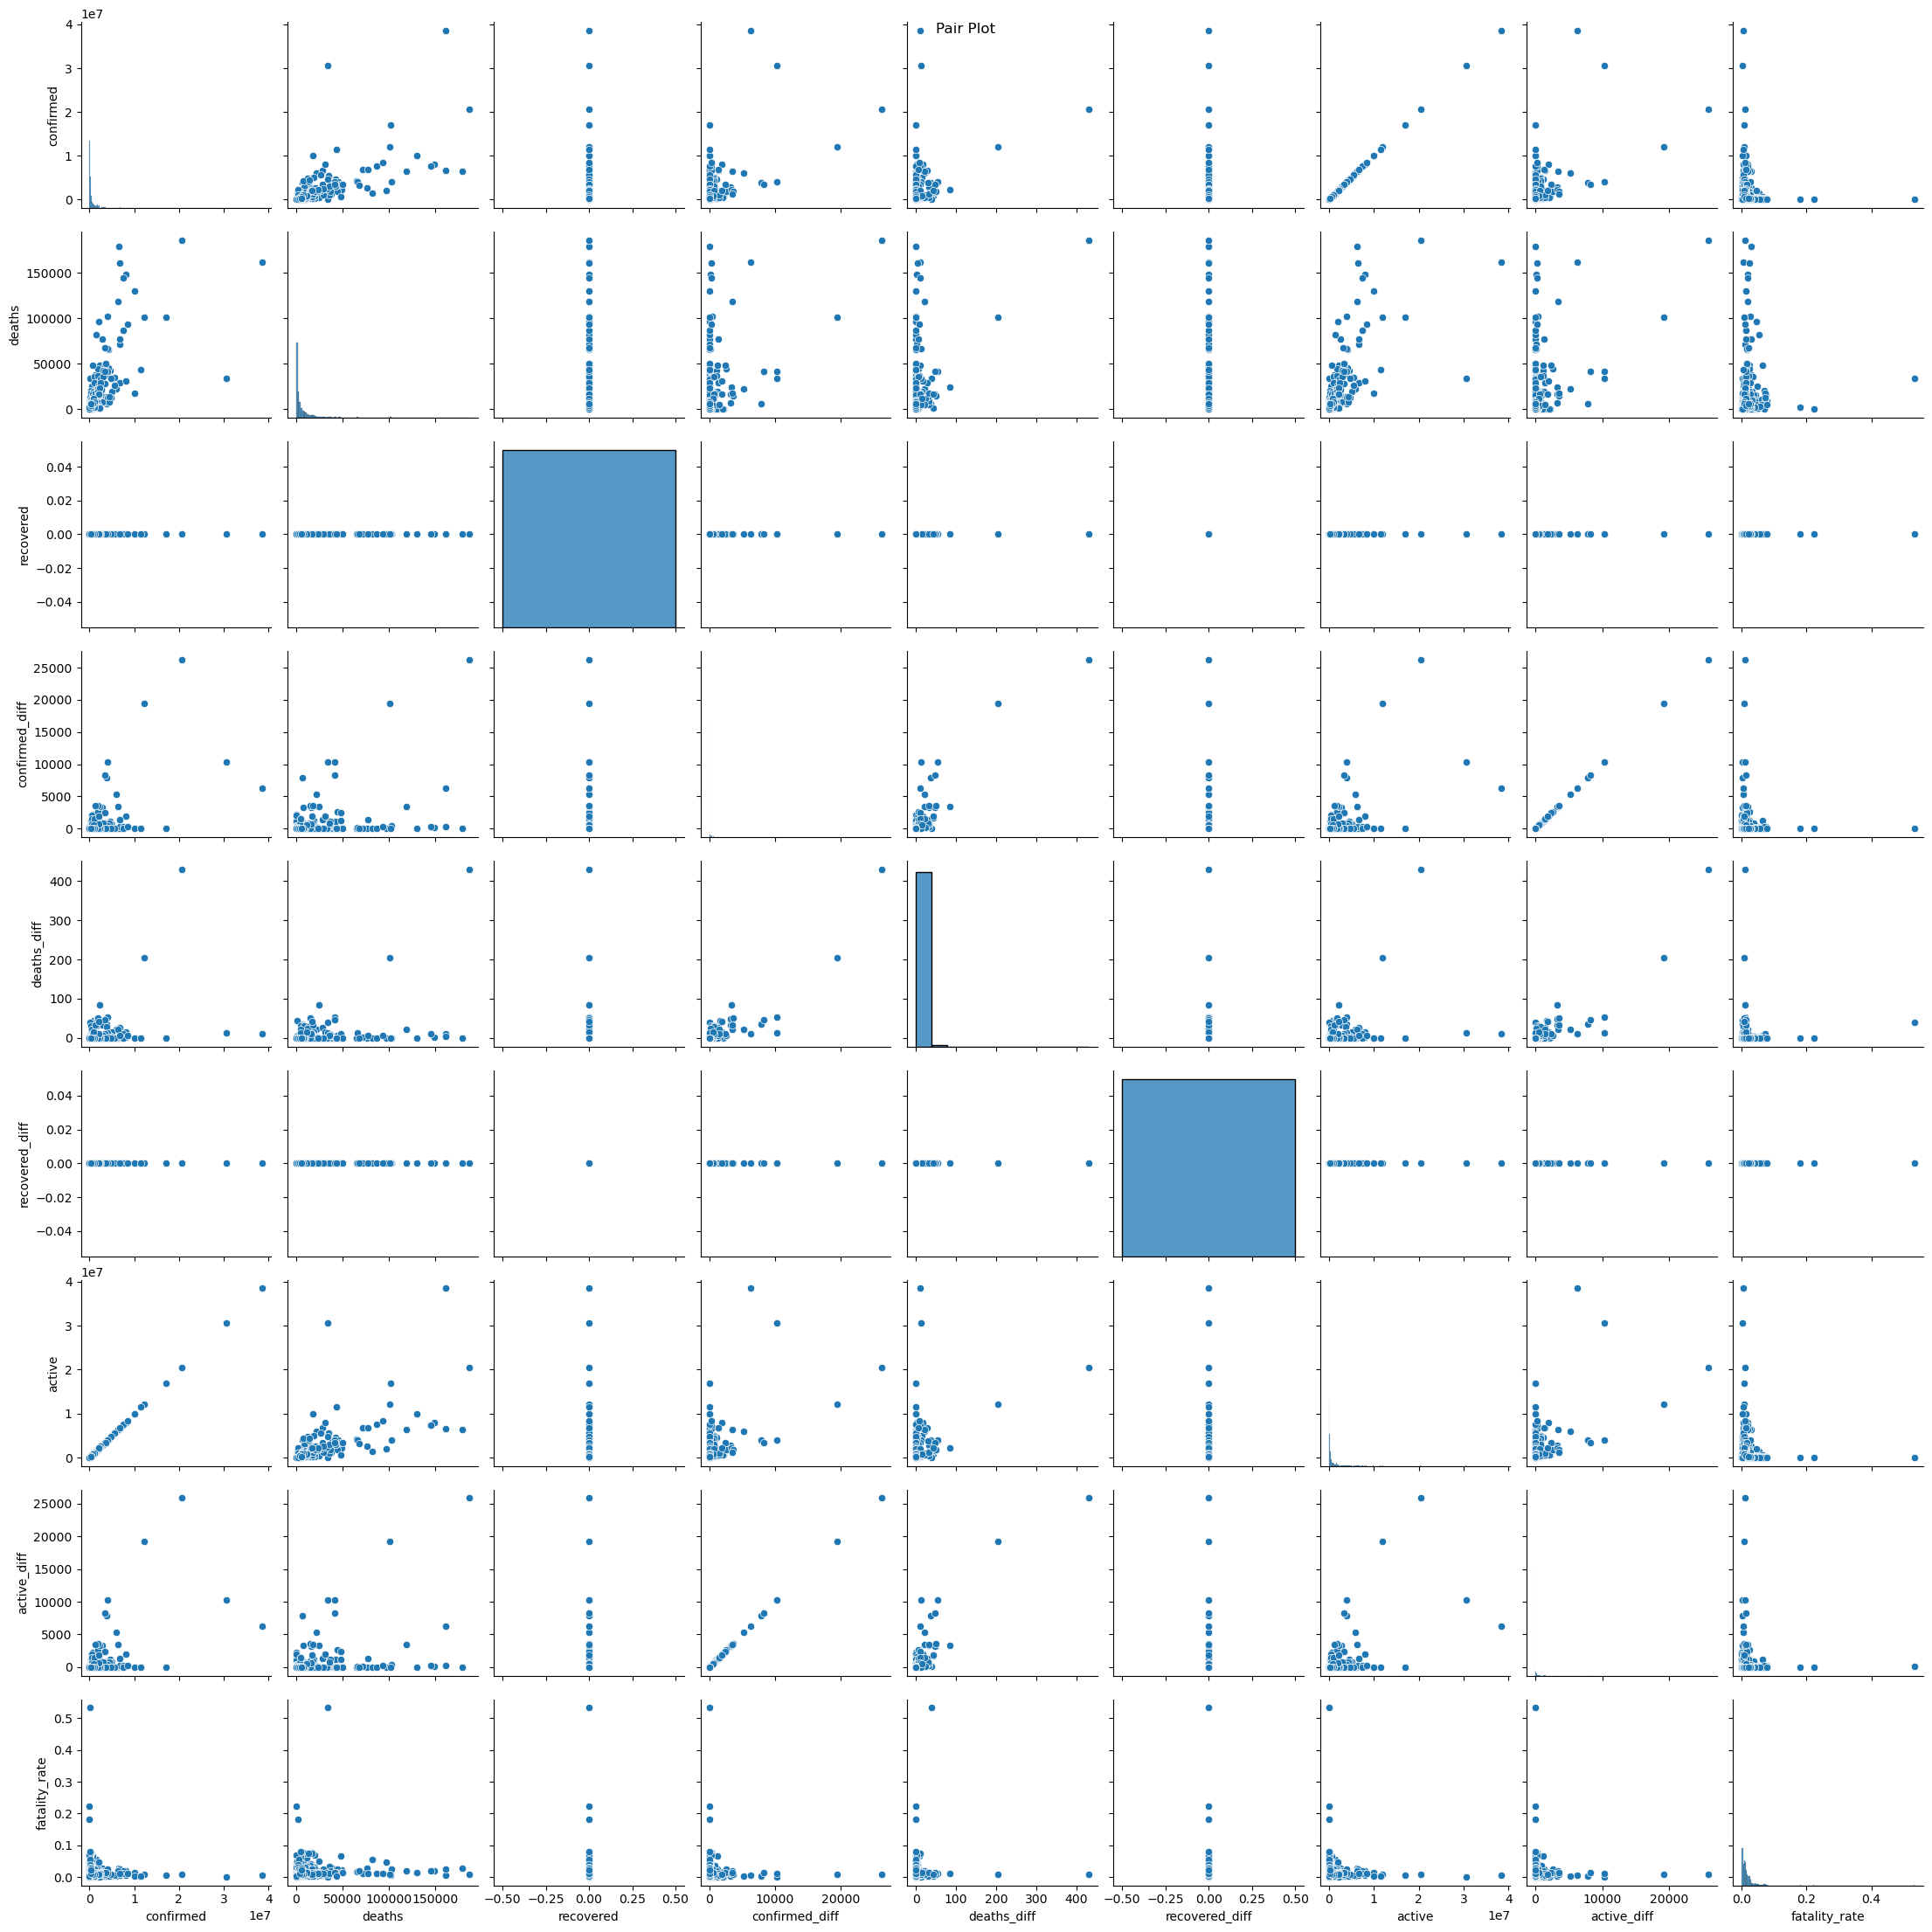

In [43]:
#pair plot investigation of dataframeReports

sns.pairplot(dataframeReports)
plt.suptitle('Pair Plot')
plt.show()

In [ ]:
# there are many plots with zeros (horizontal or vertical lines). some are concentrated closer to the origins

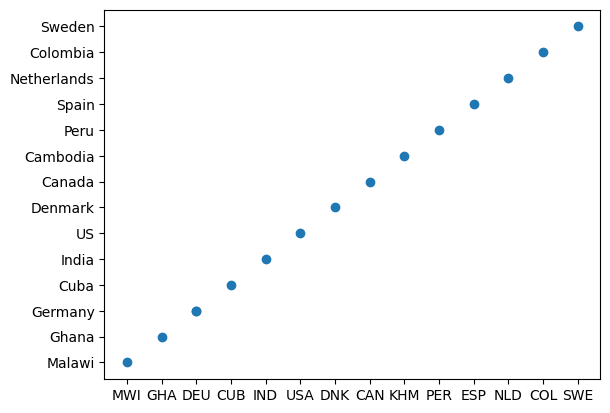

In [40]:
# scatter plot from dataframeLocations
np.random.seed(123)
dataframeLocationsample = dataframeLocation.sample(15)

plt.scatter(dataframeLocationsample['iso'],dataframeLocationsample['name'])
plt.show()

In [ ]:
# let us further investigate dataframeReports using profiling (we dont investigate dataframeLocation as actual data of covid-19 is inside dataframeReports)

In [46]:
'''
as my jupyter notbook is unable to install profiling or sweetviz packages,
i will transfer dataframeReports to csv file and store in GITHUB,
which can be used in colab to do profiling of the dataframe
''' 

'\nas my jupyter notbook is unable to install profiling or sweetviz packages,\ni will transfer dataframeReports to csv file and store in GITHUB,\nwhich can be used in colab to do profiling of the dataframe\n'

In [49]:
dataframeReports.to_csv('forprofilingpurpose.csv', sep=',', index=False, encoding='utf-8')


In [50]:
#colab link to find information on dataframeReports

In [ ]:
''' SQL Database Integration:
   - Set up a SQL database (e.g., SQLite or MySQL) using Python and store the preprocessed data into the database.
   '''

In [6]:
import sqlite3

In [7]:
connection =sqlite3.connect(r"C:\Users\User\DataAnalyticsProject\SQLfolder\DataAnalytics.db")

In [8]:
cursor = connection.cursor()

In [ ]:
cursor.execute("CREATE TABLE madhav (id INTEGER PRIMARY KEY, name TEXT, place TEXT)")

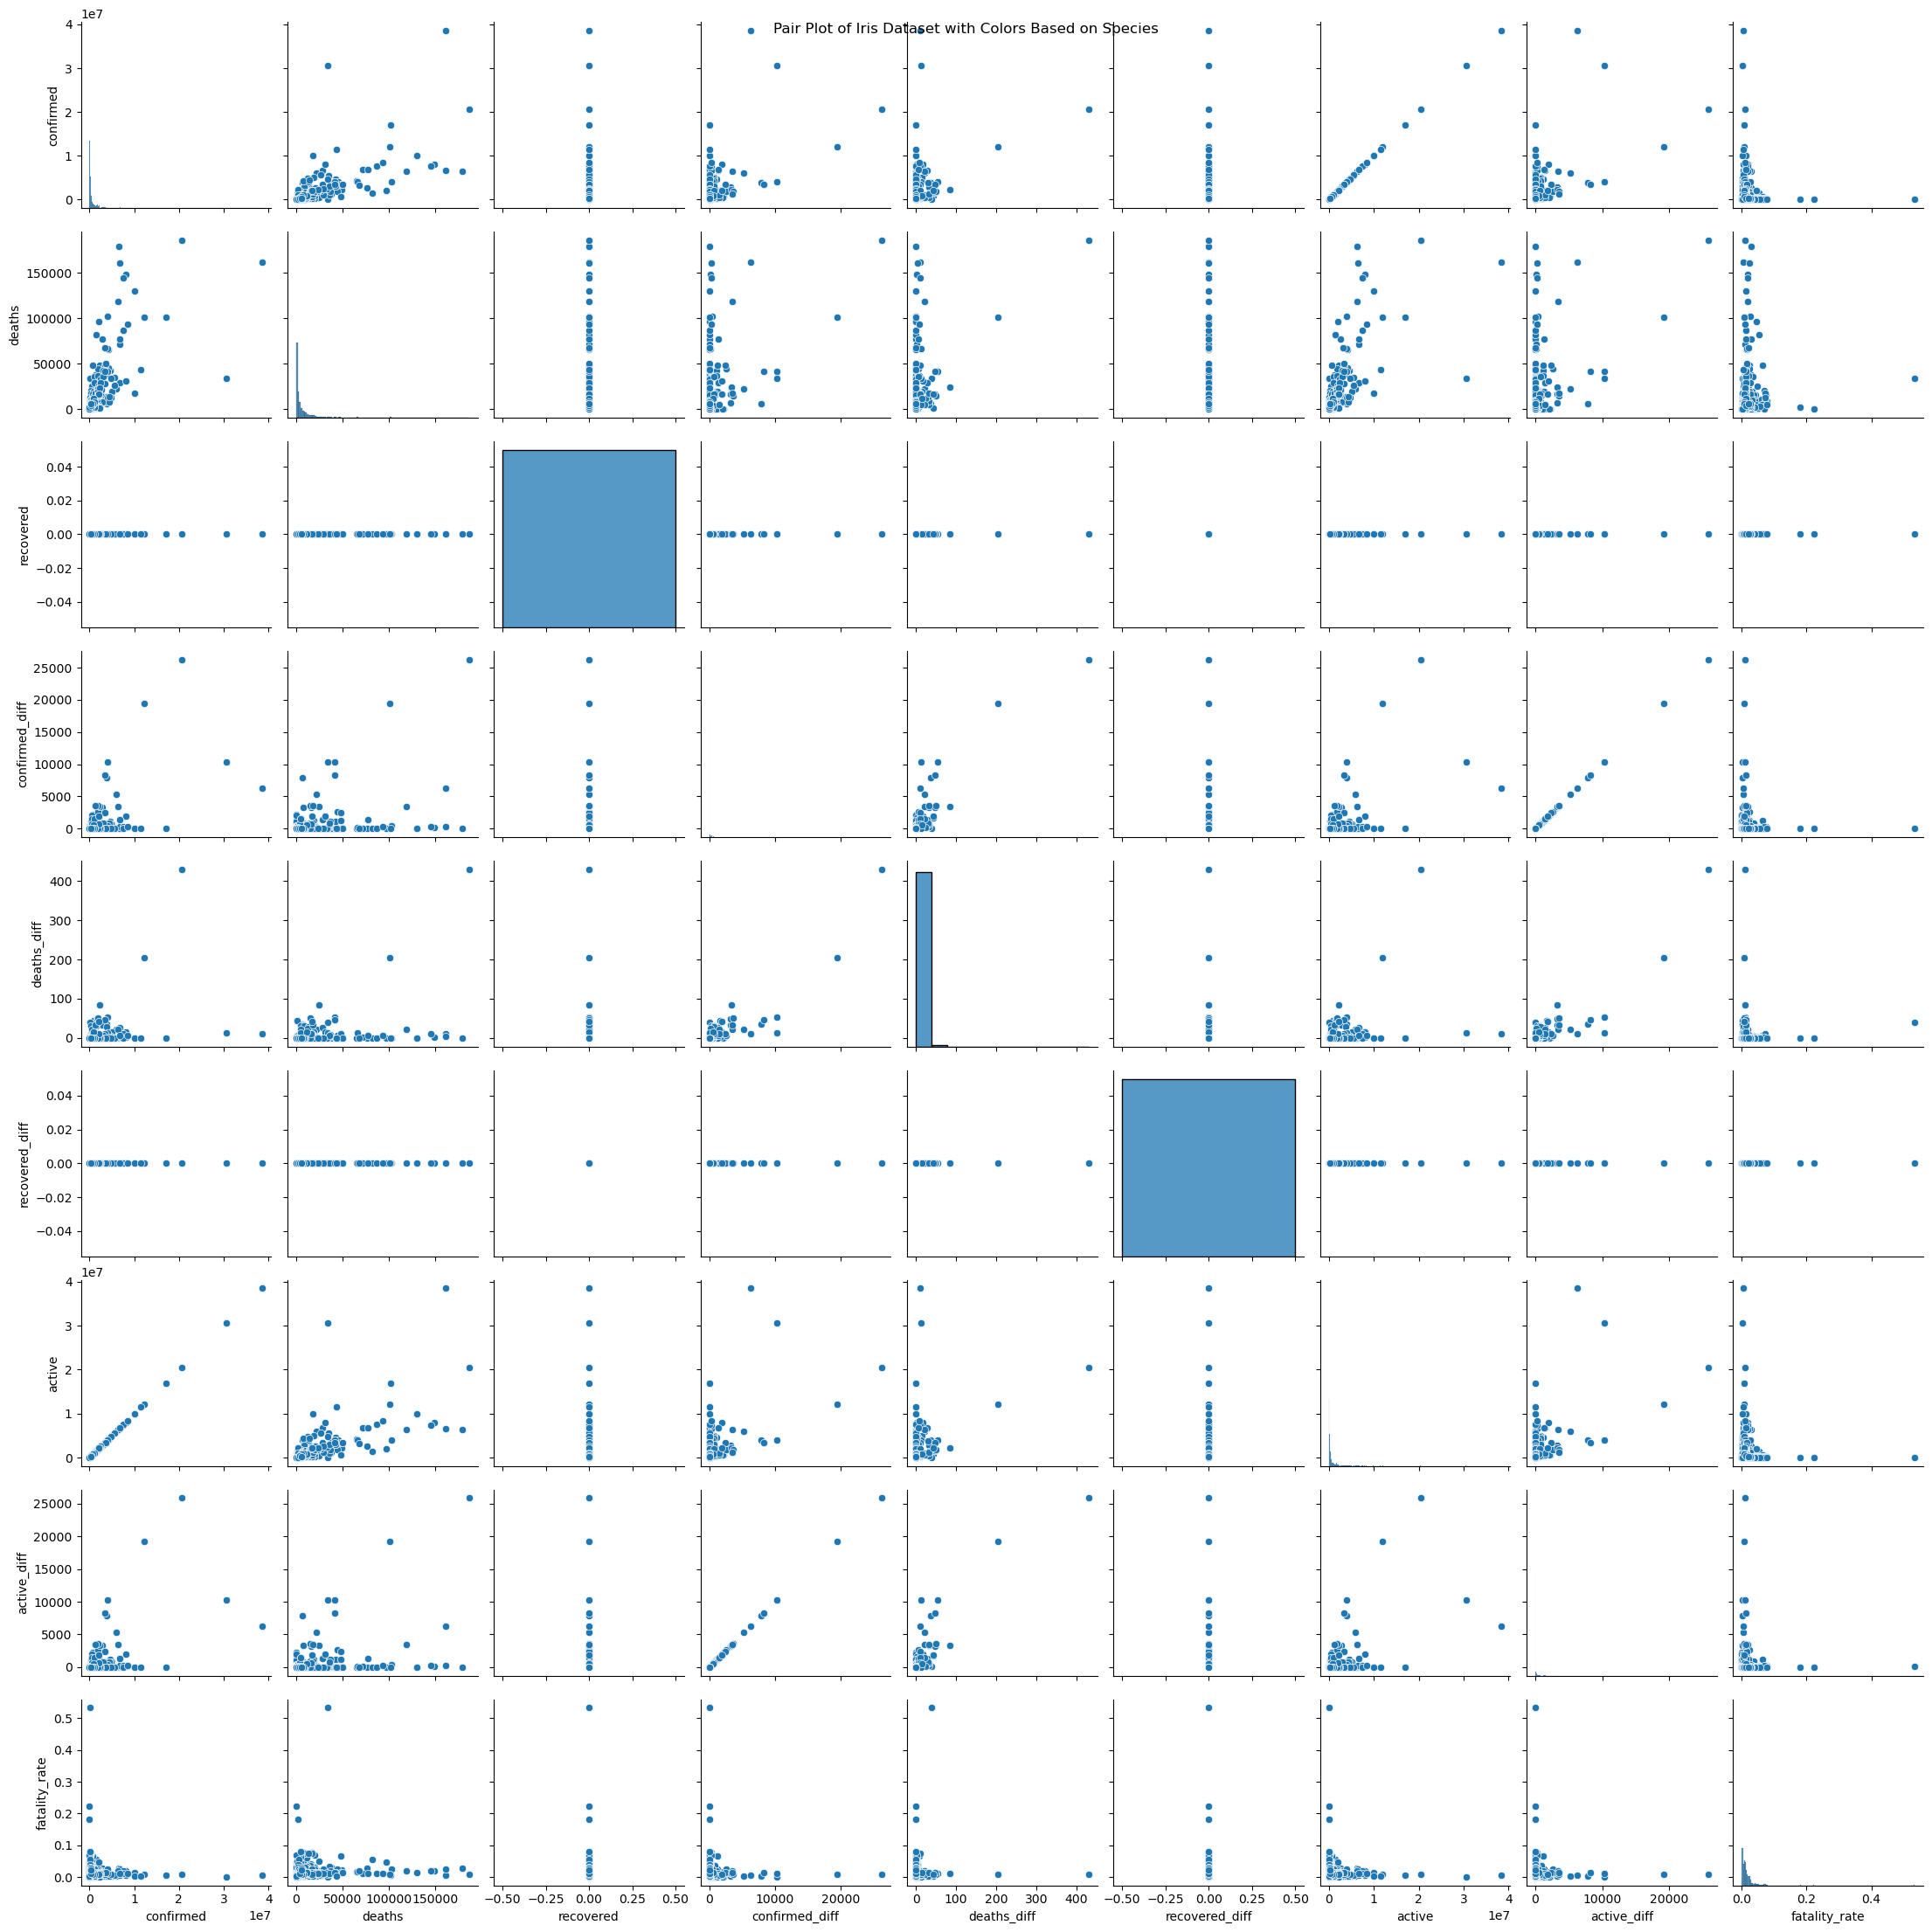

In [28]:
sns.pairplot(dataframeReports)
plt.suptitle('Pair Plot')
plt.show()

In [12]:
data=dataframe2['region']                                      
data

0      {'iso': 'AFG', 'name': 'Afghanistan', 'provinc...
1      {'iso': 'ALB', 'name': 'Albania', 'province': ...
2      {'iso': 'DZA', 'name': 'Algeria', 'province': ...
3      {'iso': 'AND', 'name': 'Andorra', 'province': ...
4      {'iso': 'AGO', 'name': 'Angola', 'province': '...
                             ...                        
786    {'iso': 'VNM', 'name': 'Vietnam', 'province': ...
787    {'iso': 'PSE', 'name': 'West Bank and Gaza', '...
788    {'iso': 'YEM', 'name': 'Yemen', 'province': ''...
789    {'iso': 'ZMB', 'name': 'Zambia', 'province': '...
790    {'iso': 'ZWE', 'name': 'Zimbabwe', 'province':...
Name: region, Length: 791, dtype: object

In [13]:
dataframe3=data.apply(pd.Series) 
dataframe3

,iso,name,province,lat,long,cities
0,AFG,Afghanistan,,33.9391,67.7100,[]
1,ALB,Albania,,41.1533,20.1683,[]
2,DZA,Algeria,,28.0339,1.6596,[]
3,AND,Andorra,,42.5063,1.5218,[]
4,AGO,Angola,,-11.2027,17.8739,[]
...,...,...,...,...,...,...
786,VNM,Vietnam,,14.0583,108.2772,[]
787,PSE,West Bank and Gaza,,31.9522,35.2332,[]
788,YEM,Yemen,,15.552726999999999,48.516388,[]
789,ZMB,Zambia,,-13.1339,27.8493,[]


In [14]:
dataframe3.describe()

,iso,name,province,lat,long,cities
count,791,791,791,775,775,791
unique,196,196,599,769,759,52
top,RUS,Russia,,0.0,0.0,[]
freq,83,83,174,4,4,740


In [ ]:
sns.pairplot(iris_data, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset with Colors Based on Species')
plt.show()